In [1]:
import numpy as np
import cupy as cp
import cupyx.scipy.signal as signal
import scipy
import pandas as pd

# import griddata
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const
from astropy.stats import gaussian_sigma_to_fwhm,gaussian_fwhm_to_sigma

import datetime
import pickle
import importlib
import json
import time
import glob

import do_wavelet
# import the module to reimport the module
import importlib
from interpolate_to_uniform_grid import interpolate_to_uniform_grid

# the wavelet code always give a warning about matplotlib tight_layout




with open('data/selected_band.pkl','rb') as f:
    selected_band = pickle.load(f)
selected_band=selected_band[selected_band['Identified']==True]
selected_band = selected_band[selected_band['Channel']=='MEGS-A']
selected_band

wavelength_full = np.load('data/wavelength_full.npz')['wavelength_full']

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 2: Create a figure with a subplot grid of 1 row and 2 columns
fig = make_subplots(rows=2, cols=2)

# Step 3: Add a line plot in the first subplot (row=1, col=1)
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6], name="Line Plot"),
    row=1, col=1
)

# Add a bar plot in the second subplot (row=1, col=2)
fig.add_trace(
    go.Bar(x=[1, 2, 3], y=[2, 3, 4], name="Bar Plot"),
    row=1, col=2
)

# Step 4: Adjust layout (optional)
fig.update_layout(title_text="Subplots Example: Line and Bar")

# Step 5: Show the figure
fig.show()


In [19]:
import importlib
importlib.reload(do_wavelet)

<module 'do_wavelet' from 'd:\\py_repo\\EVE-spectrum-correction\\Period_EVE_v1\\do_wavelet.py'>

# test of one file

In [15]:
index = 10
with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
    daily_df = pickle.load(file)
daily_df

,median_of_mean,median_of_stddev,median_of_amplitude,stddev_of_mean,stddev_of_stddev,stddev_of_amplitude,available_data,median_of_doppler
time,,,,,,,,
2010-04-30,18.685730,0.039993,0.000126,0.000467,0.000448,0.000002,8570,-47642.423668
2010-05-01,18.685568,0.040200,0.000127,0.000471,0.000424,0.000002,8579,-50235.807718
2010-05-02,18.685166,0.040109,0.000130,0.000551,0.000439,0.000002,8579,-56688.805785
2010-05-03,18.684102,0.039645,0.000131,0.000579,0.000430,0.000002,8640,-73754.162558
2010-05-04,18.683523,0.039256,0.000132,0.000463,0.000451,0.000002,8578,-83041.544856
...,...,...,...,...,...,...,...,...
2014-05-21,18.686076,0.037681,0.000211,0.000463,0.000381,0.000003,8581,-42085.227729
2014-05-22,18.686170,0.037703,0.000207,0.000470,0.000393,0.000003,8582,-40590.362289
2014-05-23,18.686074,0.037719,0.000207,0.000476,0.000383,0.000003,8582,-42124.263986


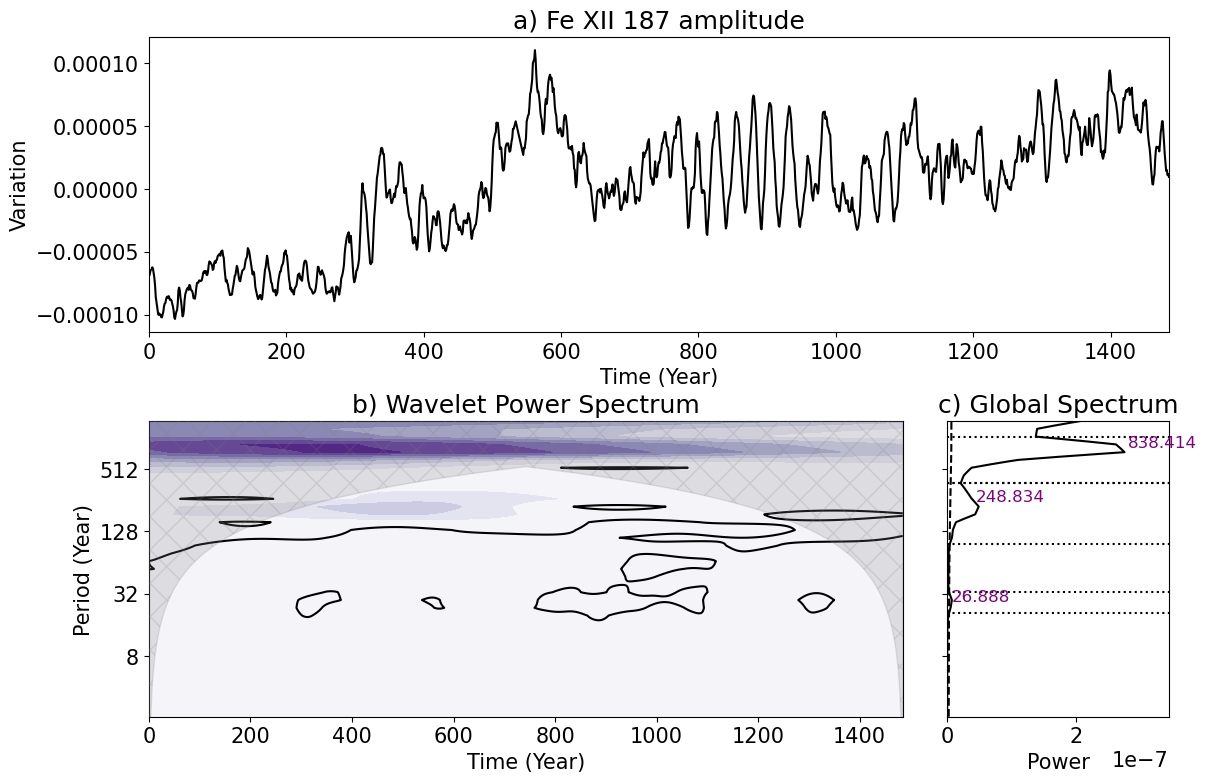

In [16]:
daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

property='amplitude'
period,global_ws,periods, starts, ends=do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                      dt=1,
                      title=selected_band.loc[index]['Line Name']+' '+property,
                      noplot=False,
)

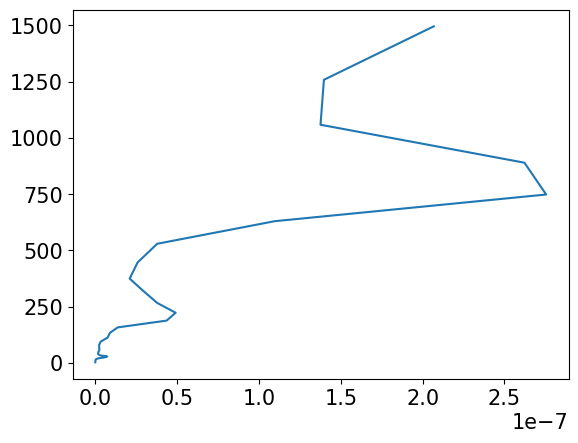

In [9]:
plt.plot(global_ws,period)

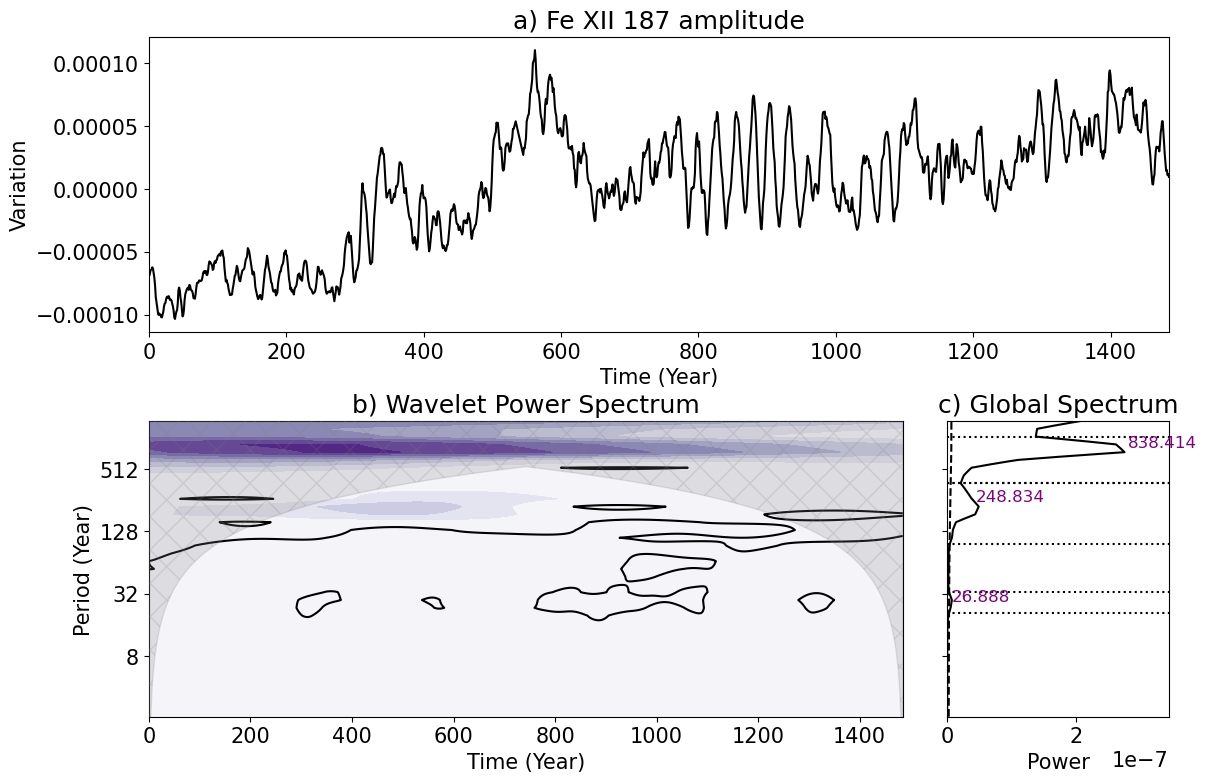

In [20]:
index = 10
with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
    daily_df = pickle.load(file)
daily_df


daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

property='amplitude'
period1,  global_ws1,periods, starts, ends=do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                      dt=1,
                      title=selected_band.loc[index]['Line Name']+' '+property,
                      noplot=False,
)

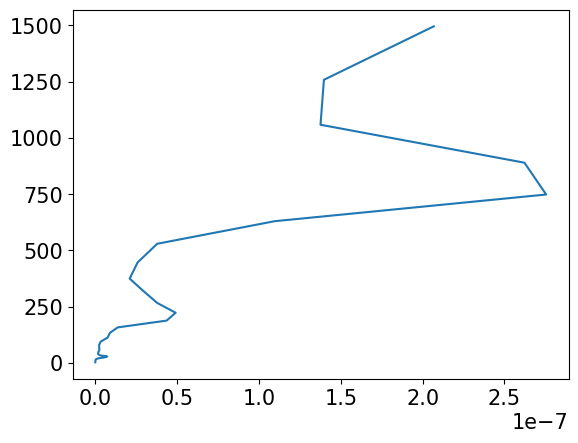

In [22]:
plt.plot(global_ws1,period1)


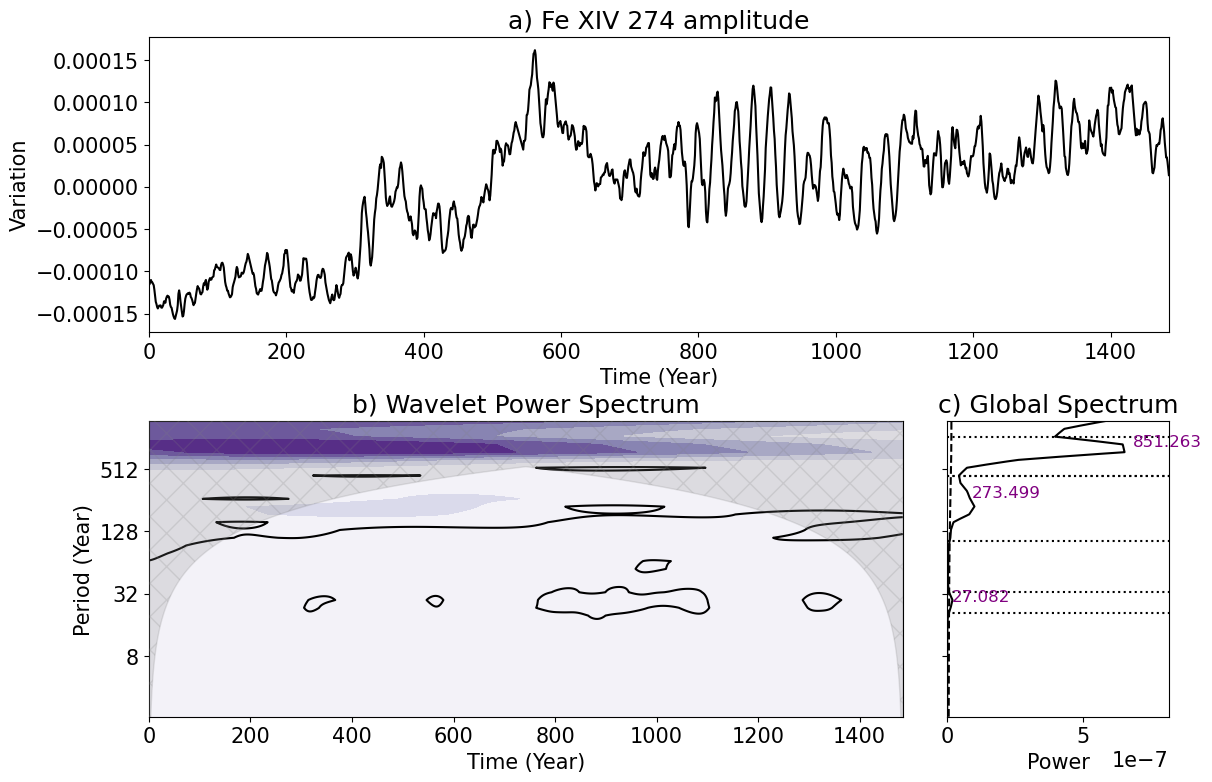

In [21]:
index = 20
with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
    daily_df = pickle.load(file)
daily_df


daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

property='amplitude'
period2,  global_ws2,periods, starts, ends=do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                      dt=1,
                      title=selected_band.loc[index]['Line Name']+' '+property,
                      noplot=False,
)

In [25]:
# check period1 and period2 are the same
np.allclose(period1,period2)

True

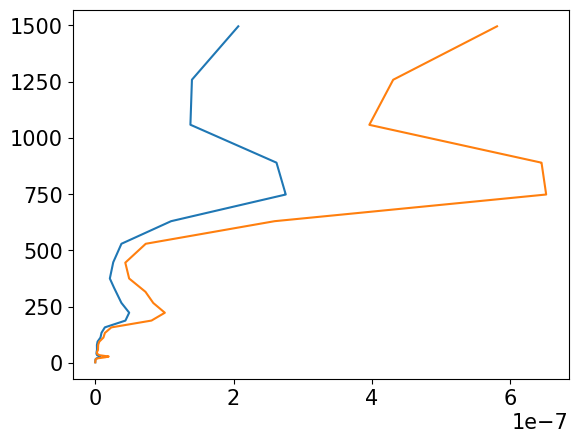

In [23]:
plt.plot(global_ws1,period1)
plt.plot(global_ws2,period2)



In [5]:
print("periods",periods)
print("starts",starts)
print("ends",ends)
print("peaks",peaks)

periods [26.701602015238816, 259.2727393339304, 853.3345791336595]
starts [ 20.4660873  94.4660873 374.0660873]
ends [  32.8660873  374.0660873 1257.8660873]
peaks [7.036037382121547e-11, 4.409899738913801e-10, 2.524424160220993e-09]


In [7]:
# add three new columns to the dataframe, "amplitude wavelet", "mean wavelet", "median wavelet"

selected_band['amplitude wavelet']={}
selected_band['mean wavelet']={}
selected_band['stddev wavelet']={}

In [3]:
selected_band

,Line Name,Wavelength Range,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index,amplitude_periods
0,Ni XI 148,"[14.75, 14.93]",6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]",NaN
1,O VI 150,"[14.93, 15.09]",5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]",NaN
2,Ni XII 152,"[15.13, 15.35]",6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ...",NaN
3,Fe XXIII 154,"[15.35, 15.53]",7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]",NaN
4,Fe IX 171,"[17, 17.21]",6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ...",NaN
5,Fe IX 174,"[17.37, 17.59]",6.05,174.531,"[0.00069, 17.45, 0.0424]","[719, 720, 721, 722, 723, 724, 725, 726, 727, ...",NaN
6,Fe X 177,"[17.63, 17.83]",6.05,177.240,"[0.00045, 17.72, 0.0424]","[732, 733, 734, 735, 736, 737, 738, 739, 740, ...",NaN
7,Fe XI 180,"[17.95, 18.15]",6.15,180.401,"[0.0006, 18.05, 0.0424]","[748, 749, 750, 751, 752, 753, 754, 755, 756, ...",NaN
8,Fe XI 182,"[18.15, 18.31]",6.15,182.167,"[0.00013, 18.22, 0.0424]","[758, 759, 760, 761, 762, 763, 764, 765]",NaN
9,Fe X 185,"[18.35, 18.59]",6.05,184.537,"[0.0002, 18.45, 0.0424]","[768, 769, 770, 771, 772, 773, 774, 775, 776, ...",NaN


## filter the unindentified spectra

In [33]:
selected_band

,Line Name,Wavelength Range,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index
0,Ni XI 148,"[14.75, 14.93]",6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]"
1,O VI 150,"[14.93, 15.09]",5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]"
2,Ni XII 152,"[15.13, 15.35]",6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ..."
3,Fe XXIII 154,"[15.35, 15.53]",7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]"
4,Fe IX 171,"[17, 17.21]",6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ..."
5,Fe IX 174,"[17.37, 17.59]",6.05,174.531,"[0.00069, 17.45, 0.0424]","[719, 720, 721, 722, 723, 724, 725, 726, 727, ..."
6,Fe X 177,"[17.63, 17.83]",6.05,177.240,"[0.00045, 17.72, 0.0424]","[732, 733, 734, 735, 736, 737, 738, 739, 740, ..."
7,Fe XI 180,"[17.95, 18.15]",6.15,180.401,"[0.0006, 18.05, 0.0424]","[748, 749, 750, 751, 752, 753, 754, 755, 756, ..."
8,Fe XI 182,"[18.15, 18.31]",6.15,182.167,"[0.00013, 18.22, 0.0424]","[758, 759, 760, 761, 762, 763, 764, 765]"
9,Fe X 185,"[18.35, 18.59]",6.05,184.537,"[0.0002, 18.45, 0.0424]","[768, 769, 770, 771, 772, 773, 774, 775, 776, ..."


# save the wavelet result into the df

In [3]:
# this code is not working 
property_list=['amplitude','mean','stddev','doppler']
for index in selected_band.index[:]:
    for property in property_list:
        with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
            daily_df = pickle.load(file)


        daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]
        
        period,global_ws,periods, starts, ends=do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                        dt=1,
                        title=selected_band.loc[index]['Line Name']+' '+property,
        )

        # such assignment is not working
        selected_band.loc[index,property+'_periods']=periods
        selected_band.loc[index,property+'_period']=period
        selected_band.loc[index,property+'_global_ws']=global_ws       

ValueError: Must have equal len keys and value when setting with an iterable

In [30]:
periods

[nan, 239.23269615331523, 834.9916623932752]

In [2]:
# this code is working
def get_wavelet_result_1d(row,property):
    # property='amplitude'
    with open('./data/daily_df/daily_df_'+row['Line Name']+'.pkl', 'rb') as file:
        daily_df = pickle.load(file)
    daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]
    period,global_ws,periods, starts, ends=do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                      dt=1,
                      title=row['Line Name']+' '+property,
    )

    #first only analyze the periods. More can be added later
    return periods#  , starts, ends, peaks



# this code is working
def get_wavelet_result_2d(row,property):
    # property='amplitude'
    with open('./data/daily_df/daily_df_'+row['Line Name']+'.pkl', 'rb') as file:
        daily_df = pickle.load(file)
    daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]
    period,global_ws,periods, starts, ends=do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                      dt=1,
                      title=row['Line Name']+' '+property,
    )

    #first only analyze the periods. More can be added later
    return period,global_ws#  , starts, ends, peaks

In [3]:
df=selected_band.copy()

# periods: significant period in a list: like 30d , 220 d
df['amplitude periods']=df.apply(lambda row: get_wavelet_result_1d(row,'amplitude'),axis=1)
df['mean periods']=df.apply(lambda row: get_wavelet_result_1d(row,'mean'),axis=1)
df['stddev periods']=df.apply(lambda row: get_wavelet_result_1d(row,'stddev'),axis=1)

# period: the full doppler result
# global_ws: the full doppler result
df['doppler period']=df.apply(lambda row: get_wavelet_result_2d(row,'doppler')[0],axis=1)
df['doppler global_ws']=df.apply(lambda row: get_wavelet_result_2d(row,'doppler')[1],axis=1)

In [4]:
df

,Line Name,Wavelength Range,Identified,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index,Channel,amplitude periods,mean periods,stddev periods,doppler period,doppler global_ws
0,Ni XI 148,"[14.75, 14.93]",True,6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]",MEGS-A,"[nan, 239.23269615331523, 834.9916623932752]","[14.11642653698231, 27.616775785822178, 51.370...","[13.026210611381849, 28.5429121955423, 53.1942...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1944557.8565380678, 2908381.3057330726, 38450..."
1,O VI 150,"[14.93, 15.09]",True,5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]",MEGS-A,"[26.701602015238816, 259.2727393339304, 853.33...","[13.481030488216206, 30.499353485649124, 53.08...","[26.806840490411698, 134.2682339833241, 249.25...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1192975.5412373617, 1663035.5009875353, 21173..."
2,Ni XII 152,"[15.13, 15.35]",True,6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ...",MEGS-A,"[27.117571524498473, 255.21324632341287, 841.8...","[13.942558059668865, 27.37371178753602, 225.83...","[nan, 231.9194905042568]","[2.0660872954985074, 2.2660872954985076, 2.466...","[2239690.551712684, 3451485.887674397, 4640289..."
3,Fe XXIII 154,"[15.35, 15.53]",True,7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]",MEGS-A,"[27.110493792061085, 255.86209714354735, 840.5...","[13.964131113675196, 27.74466947337789, 405.26...",[238.73143424250176],"[2.0660872954985074, 2.2660872954985076, 2.466...","[2305089.093644407, 3449054.0017540213, 456876..."
4,Fe IX 171,"[17, 17.21]",True,6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ...",MEGS-A,"[26.70760787502137, 73.73206066062396, 236.822...","[13.532917814204527, 29.054406650080086, 51.68...","[2.0660872954985074, 26.431649936195047, 390.3...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2605630.5494091106, 3709261.8275745297, 47986..."
5,Fe IX 174,"[17.37, 17.59]",True,6.05,174.531,"[0.00069, 17.45, 0.0424]","[719, 720, 721, 722, 723, 724, 725, 726, 727, ...",MEGS-A,"[26.543304166810913, 75.38422483832991, 235.10...","[14.232250755617223, 29.89979403239308, 52.154...","[26.030575839981346, 2.2660872954985076, nan, ...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2301374.631871142, 3238066.920951717, 4159610..."
6,Fe X 177,"[17.63, 17.83]",True,6.05,177.240,"[0.00045, 17.72, 0.0424]","[732, 733, 734, 735, 736, 737, 738, 739, 740, ...",MEGS-A,"[26.395656081628637, 70.73180900950723, 237.56...","[13.860171587758497, 30.0497424005258, nan, 17...","[26.611852491649536, 263.1162901271579, nan, 8...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2379270.880961337, 3266630.1313473363, 413453..."
7,Fe XI 180,"[17.95, 18.15]",True,6.15,180.401,"[0.0006, 18.05, 0.0424]","[748, 749, 750, 751, 752, 753, 754, 755, 756, ...",MEGS-A,"[26.869025381664276, 228.11010446186592, 853.7...","[14.192207525078077, 23.295190875039943, nan, ...","[27.277732787736475, 229.8125995608472, 391.82...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2051786.0122053358, 2928917.995596713, 378380..."
8,Fe XI 182,"[18.15, 18.31]",True,6.15,182.167,"[0.00013, 18.22, 0.0424]","[758, 759, 760, 761, 762, 763, 764, 765]",MEGS-A,"[26.723429032597693, 240.73008762828442, 831.1...","[14.076988312823698, 26.32349189434033, 173.81...","[9.7073437369755, nan, 29.18938135918841, 54.0...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1528403.293039175, 2123815.0670169303, 270518..."
9,Fe X 185,"[18.35, 18.59]",True,6.05,184.537,"[0.0002, 18.45, 0.0424]","[768, 769, 770, 771, 772, 773, 774, 775, 776, ...",MEGS-A,"[26.75189637953738, 67.46226334135979, 243.226...","[nan, 30.552775730836245, 56.0383601749756, 11...","[27.313476802253685, 56.69619977678526, nan, 2...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2916374.058457177, 406067

In [5]:
with open('data/wavelet_df/wavelet_result.pkl','wb') as f:
    pickle.dump(df,f)

In [6]:
with open('data/wavelet_df/wavelet_result.pkl','rb') as f:
    df = pickle.load(f)

## draft 1

### 2d scatter with color 

In [100]:

# Sample data
x = [1, 2, 3]
y_list = [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8]]

# Choose a colormap
colormap = cm.viridis  # Example using Viridis

# Calculate normalized values for each trace
num_traces = len(y_list)
norm_values = [i / (num_traces - 1) for i in range(num_traces)]

# Create the figure
fig = go.Figure()

# Add traces to the figure
for i, y in enumerate(y_list):
    # Get color from colormap and convert to hex format
    color_rgba = colormap(norm_values[i])
    

    fig.add_trace(go.Scatter(
        x=x, 
        y=y, 
        mode='markers', 
        marker=dict(color='rgba'+str(colormap(norm_values[i]))),  # Use hex color
        name=f'Trace {i}',
    ))

# Show plot
fig.show()


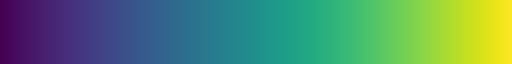

In [74]:
colormap = cm.viridis
colormap

In [87]:
color

(0.993248, 0.906157, 0.143936, 1.0)

In [90]:
colormap = cm.viridis
color=colormap(1.5)
# Create a figure
fig = go.Figure()

# Add a trace with a single marker of the specified color
fig.add_trace(go.Scatter(
    x=[0.5], 
    y=[0.5], 
    marker=dict(size=20, color='rgba(255, 0, 0, .8)'),  # Set marker color to a named color
    mode='markers'
))

# Customize figure layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()

In [126]:
import plotly.graph_objects as go
import pandas as pd

# Load the dataset (assuming 'tips' dataset is similar to the one used in Plotly Express example)
df = pd.DataFrame({
    "total_bill": [16.99, 10.34, 21.01, 23.68, 24.59],
    "tip": [1.01, 1.66, 3.50, 3.31, 3.61],
    "size": [2, 3, 3, 2, 4]
})

# Prepare data for plotting
x = df["total_bill"]
y = df["tip"]
sizes = df["size"]

# Create a color scale based on 'size' values
# Normalize 'size' values for color scale mapping
size_min, size_max = sizes.min(), sizes.max()
norm_sizes = (sizes - size_min) / (size_max - size_min)

# Choose a color scale
color_scale = "Viridis"

# Map normalized 'size' values to colors using the color scale
colors = [px.colors.sample_colorscale(color_scale, norm_size) for norm_size in norm_sizes]

# Create the figure
fig = go.Figure()

# Add the scatter plot
fig.add_trace(go.Scatter(
    x=x, 
    y=y, 
    mode='markers', 
    marker=dict(
        color=sizes,  # Assign colors based on 'size' values
        colorscale=color_scale,  # Use the chosen color scale
        size=sizes*5,  # Optionally scale marker sizes by 'size' for visual distinction
        colorbar=dict(title='Size')  # Add a color bar to indicate what the colors represent
    ),
    text=sizes,  # Optionally add text labels for 'size'
))

# Set plot title
fig.update_layout(title="Numeric 'size' values mean continuous color")

# Show plot
fig.show()


In [114]:
fig = px.scatter(df, x="total_bill", y="tip", color="size",
                 title="String 'size' values mean discrete colors")

fig.show()

In [121]:
import plotly.express as px
df = px.data.tips()
# df["size"] = df["size"].astype(str)
fig = px.scatter(df, x="total_bill", y="tip", color="size",
                 title="String 'size' values mean discrete colors")

fig.show()

In [130]:
# https://plotly.com/python/colorscales/

# Load the sample data

df = px.data.tips()
df = pd.DataFrame({
    "total_bill": [16.99, 10.34, 21.01, 23.68, 24.59],
    "tip": [1.01, 1.66, 3.5, 3.31, 3.61],
    "size": [2, 3, 3, 2, 4]
})




# Define a color scale - You can adjust this scale as needed
color_scale = 'Viridis'

# Normalize 'size' column for color scaling
size_min = df['size'].min()
size_max = df['size'].max()
df['size_norm'] = (df['size'] - size_min) / (size_max - size_min)

# Create figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=df['total_bill'],
    y=df['tip'],
    mode='markers',
    marker=dict(
        color=df['size_norm'],  # Use normalized 'size' for color
        colorscale=color_scale,  # Define color scale
        colorbar=dict(title='Size'),  # Show color scale bar
        showscale=True
    ),
    text=df['size'],  # Hover text shows 'size'
))

# Update layout with title
fig.update_layout(title_text="Numeric 'size' values mean continuous color")

# Show figure
fig.show()


### 3d surface

In [27]:
import numpy as np
from scipy.interpolate import griddata

def interpolate_to_uniform_grid(x, y, z, resolution=100,method='cubic'):
    """
    Interpolates non-uniform x, y data onto a uniform grid.

    Parameters:
    - x: 1D array of x coordinates.
    - y: 1D array of y coordinates.
    - z: 2D array of data values, shape should be len(y) by len(x).
    - resolution: Number of points in each dimension for the uniform grid.
    - method: Interpolation method. Options are 'linear', 'nearest', 'cubic'.

    Returns:
    - xi, yi: Meshgrid arrays of x and y coordinates for the uniform grid.
    - zi: 2D array of interpolated data on the uniform grid.
    """
    resolution_x=resolution*len(x)
    resolution_y=resolution*len(y)
    # Create a meshgrid from the non-uniform x, y data
    X, Y = np.meshgrid(x, y)
    
    # Flatten the meshgrid and data for interpolation
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    z_flat = z.flatten()

    # Define the uniform grid
    xi = np.linspace(np.min(x), np.max(x), resolution_x)
    yi = np.linspace(np.min(y), np.max(y), resolution_y)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate the data onto the uniform grid
    zi = griddata((X_flat, Y_flat), z_flat, (xi, yi), method=method)
    
    return xi, yi, zi

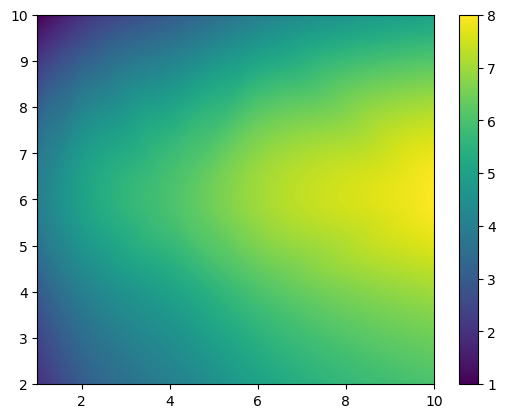

In [29]:
x = np.array([1, 2, 4, 6, 10])
y = np.array([10, 2, 4, 6, 10])  # Non-uniform y
z = np.array([[1, 2, 3, 4, 5], 
              [2, 3, 4, 5, 6], 
              [3, 4, 5, 6, 7], 
              [4, 5, 6, 7, 8], 
              [5, 6, 7, 8, 9]])

xi, yi, zi=interpolate_to_uniform_grid(x,y,z)
fig,ax=plt.subplots()
# add a colorbar
# ax.contourf(xi,yi,zi)
cax = ax.pcolormesh(xi, yi, zi, shading='auto')
fig.colorbar(cax, ax=ax)

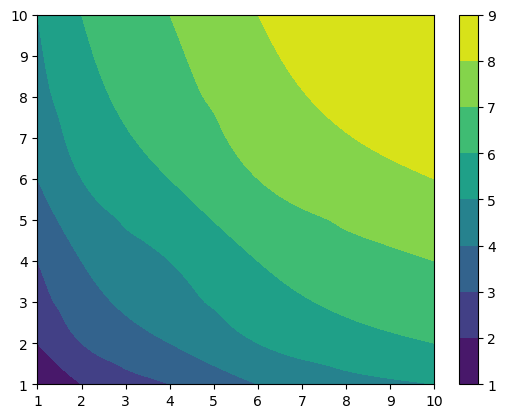

In [26]:
x = np.array([1, 2, 4, 6, 10])
y = np.array([1, 2, 4, 6, 10])  # Non-uniform y
z = np.array([[1, 2, 3, 4, 5], 
              [2, 3, 4, 5, 6], 
              [3, 4, 5, 6, 7], 
              [4, 5, 6, 7, 8], 
              [5, 6, 7, 8, 9]])

xi, yi, zi=interpolate_to_uniform_grid(x,y,z)
fig,ax=plt.subplots()
# add a colorbar
cax =ax.contourf(xi,yi,zi)
fig.colorbar(cax, ax=ax)

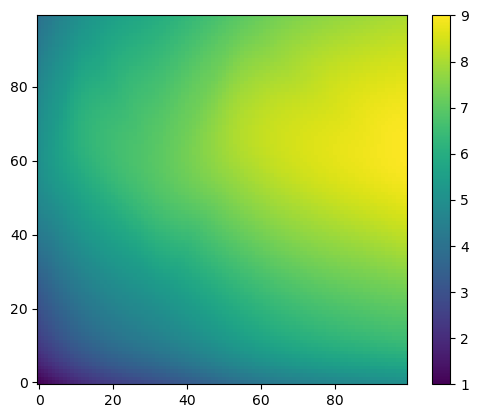

In [25]:
fig,ax=plt.subplots()
sc=ax.imshow(zi, origin='lower',cmap='viridis')
plt.colorbar(sc)

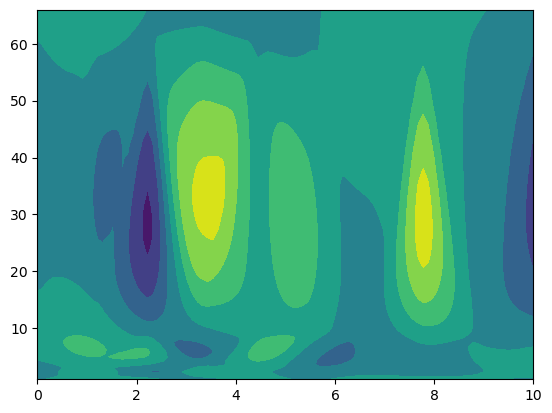

In [9]:
x = np.array([1, 2, 4, 66, 10])
y = np.array([1, 2, 4, 66, 10])  # Non-uniform y
z = np.random.rand(5, 10)  # Your data matrix
xi, yi, zi=interpolate_to_uniform_grid(x,y,z)
fig,ax=plt.subplots()
ax.contourf(xi,yi,zi)

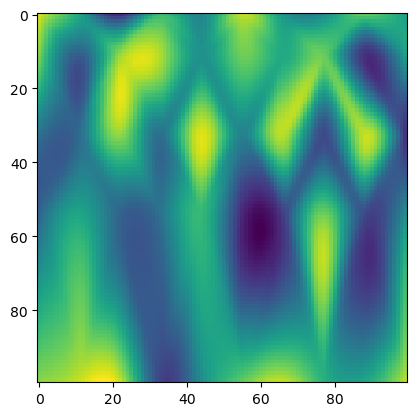

In [8]:
x = np.linspace(0, 10, 10)  # Linearly spaced x
y = np.array([1, 2, 4, 6, 10])  # Non-uniform y
z = np.random.rand(5, 10)  # Your data matrix
xi, yi, zi=interpolate_to_uniform_grid(x,y,z)
fig,ax=plt.subplots()
ax.imshow(zi)

In [10]:
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

In [12]:
z_data.values

array([[ 0.000000e+00,  2.780985e+01,  4.961936e+01,  8.308067e+01,
         1.166632e+02,  1.304140e+02,  1.507206e+02,  2.201871e+02,
         1.561536e+02,  1.486416e+02,  2.037845e+02,  2.060386e+02,
         1.071618e+02,  6.836975e+01,  4.533590e+01,  4.996142e+01,
         2.189279e+01,  1.702552e+01,  1.174317e+01,  1.475226e+01,
         1.366710e+01,  5.677561e+00,  3.312340e+00,  1.156517e+00,
        -1.476620e-01],
       [ 1.000000e+00,  2.771966e+01,  4.855022e+01,  6.521374e+01,
         9.527666e+01,  1.169964e+02,  1.339056e+02,  1.523412e+02,
         1.519340e+02,  1.601139e+02,  1.795327e+02,  1.476184e+02,
         1.703943e+02,  1.218194e+02,  5.258537e+01,  3.308871e+01,
         3.840972e+01,  4.424843e+01,  6.957860e+01,  4.019351e+00,
         3.050024e+00,  3.039719e+00,  2.996142e+00,  2.967954e+00,
         1.999594e+00],
       [ 2.000000e+00,  3.042670e+01,  3.347752e+01,  4.480953e+01,
         6.247495e+01,  7.743523e+01,  1.042153e+02,  1.027393e+02,


In [13]:
fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

# Plotly plot

## reorganize the data into df in preparation for the plotly plot

In [7]:
with open('data/wavelet_df/wavelet_result.pkl','rb') as f:
    df = pickle.load(f)
    
df.head()

,Line Name,Wavelength Range,Identified,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index,Channel,amplitude periods,mean periods,stddev periods,doppler period,doppler global_ws
0,Ni XI 148,"[14.75, 14.93]",True,6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]",MEGS-A,"[nan, 239.23269615331523, 834.9916623932752]","[14.11642653698231, 27.616775785822178, 51.370...","[13.026210611381849, 28.5429121955423, 53.1942...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1944557.8565380678, 2908381.3057330726, 38450..."
1,O VI 150,"[14.93, 15.09]",True,5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]",MEGS-A,"[26.701602015238816, 259.2727393339304, 853.33...","[13.481030488216206, 30.499353485649124, 53.08...","[26.806840490411698, 134.2682339833241, 249.25...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1192975.5412373617, 1663035.5009875353, 21173..."
2,Ni XII 152,"[15.13, 15.35]",True,6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ...",MEGS-A,"[27.117571524498473, 255.21324632341287, 841.8...","[13.942558059668865, 27.37371178753602, 225.83...","[nan, 231.9194905042568]","[2.0660872954985074, 2.2660872954985076, 2.466...","[2239690.551712684, 3451485.887674397, 4640289..."
3,Fe XXIII 154,"[15.35, 15.53]",True,7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]",MEGS-A,"[27.110493792061085, 255.86209714354735, 840.5...","[13.964131113675196, 27.74466947337789, 405.26...",[238.73143424250176],"[2.0660872954985074, 2.2660872954985076, 2.466...","[2305089.093644407, 3449054.0017540213, 456876..."
4,Fe IX 171,"[17, 17.21]",True,6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ...",MEGS-A,"[26.70760787502137, 73.73206066062396, 236.822...","[13.532917814204527, 29.054406650080086, 51.68...","[2.0660872954985074, 26.431649936195047, 390.3...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2605630.5494091106, 3709261.8275745297, 47986..."


In [8]:
# amplitude_periods_list
temperaure_list=np.array([])
amplitude_periods_list=np.array([])
wavelength_list=np.array([])
line_name_list=[]

for index in df.index:
    new_amplitude_periods=df.loc[index,'amplitude periods']  
    new_wavelength=np.full(len(new_amplitude_periods),df.loc[index,'Accurate Wavelength'])
    new_temperature=np.full(len(new_amplitude_periods),df.loc[index,'Temperature'])
    new_line_name=[df.loc[index,'Line Name']] * len(new_amplitude_periods)

    # append the new data to the list
    amplitude_periods_list=np.append(amplitude_periods_list,new_amplitude_periods)
    wavelength_list=np.append(wavelength_list,new_wavelength)
    temperaure_list=np.append(temperaure_list,new_temperature)
    line_name_list=line_name_list+new_line_name

# create a new dataframe
wavelet_amplitude_df_1d=pd.DataFrame({'wavelength':wavelength_list,
                         'temperature':temperaure_list,
                         'amplitude periods':amplitude_periods_list,
                            'line name':line_name_list
                         })  
with open('data/wavelet_amplitude_df.pkl','wb') as f:
    pickle.dump(wavelet_amplitude_df_1d,f)
    

In [9]:
# mean_periods_list
temperaure_list=np.array([])
mean_periods_list=np.array([])
wavelength_list=np.array([])
line_name_list=[]

for index in df.index:
    new_mean_periods=df.loc[index,'mean periods']  
    new_wavelength=np.full(len(new_mean_periods),df.loc[index,'Accurate Wavelength'])
    new_temperature=np.full(len(new_mean_periods),df.loc[index,'Temperature'])
    new_line_name=[df.loc[index,'Line Name']] * len(new_mean_periods)

    # append the new data to the list
    mean_periods_list=np.append(mean_periods_list,new_mean_periods)
    wavelength_list=np.append(wavelength_list,new_wavelength)
    temperaure_list=np.append(temperaure_list,new_temperature)
    line_name_list=line_name_list+new_line_name

# create a new dataframe
wavelet_mean_df_1d=pd.DataFrame({'wavelength':wavelength_list,
                         'temperature':temperaure_list,
                         'mean periods':mean_periods_list,
                            'line name':line_name_list
                         })

with open('data/wavelet_mean_df.pkl','wb') as f:
    pickle.dump(wavelet_mean_df_1d,f)

In [10]:
# stddev_periods_list
temperaure_list=np.array([])
stddev_periods_list=np.array([])
wavelength_list=np.array([])
line_name_list=[]
for index in df.index:
    new_stddev_periods=df.loc[index,'stddev periods']  
    new_wavelength=np.full(len(new_stddev_periods),df.loc[index,'Accurate Wavelength'])
    new_temperature=np.full(len(new_stddev_periods),df.loc[index,'Temperature'])
    new_line_name=[df.loc[index,'Line Name']] * len(new_stddev_periods)

    # append the new data to the list
    stddev_periods_list=np.append(stddev_periods_list,new_stddev_periods)
    wavelength_list=np.append(wavelength_list,new_wavelength)
    temperaure_list=np.append(temperaure_list,new_temperature)
    line_name_list=line_name_list+new_line_name

# create a new dataframe
wavelet_stddev_df_1d=pd.DataFrame({'wavelength':wavelength_list,
                         'temperature':temperaure_list,
                         'stddev periods':stddev_periods_list,
                            'line name':line_name_list
                         })

with open('data/wavelet_stddev_df.pkl','wb') as f:
    pickle.dump(wavelet_stddev_df_1d,f)
    

In [53]:
wavelet_stddev_df_1d.head()

,wavelength,temperature,stddev periods,line name
0,148.377,6.2,13.026211,Ni XI 148
1,148.377,6.2,28.542912,Ni XI 148
2,148.377,6.2,53.194244,Ni XI 148
3,148.377,6.2,1590.832975,Ni XI 148
4,148.377,6.2,862.272090,Ni XI 148


In [50]:
# all the spectrum has the same period
a=np.vstack(df['doppler period'].values)
for i in range(0,df.shape[0]):
    if not np.allclose(a[i],a[0]):
        print("not all the spectrum have the same period")
    

## one plot

In [2]:
with open('data/wavelet_df/wavelet_amplitude_df.pkl','rb') as f:
    wavelet_amplitude_df = pickle.load(f)

In [3]:
wavelet_amplitude_df

,wavelength,temperature,amplitude periods,line name
0,148.377,6.2,NaN,Ni XI 148
1,148.377,6.2,239.232696,Ni XI 148
2,148.377,6.2,834.991662,Ni XI 148
3,150.089,5.5,26.701602,O VI 150
4,150.089,5.5,259.272739,O VI 150
...,...,...,...,...
82,356.037,6.2,825.591973,Si X 356
83,368.071,6.0,31.719058,Mg IX 368
84,368.071,6.0,54.546582,Mg IX 368
85,368.071,6.0,262.254801,Mg IX 368


In [5]:
# https://plotly.com/python/colorscales/



# Define a color scale: suggested: Viridis, inferno, magma, plasma, cividis,spectral
color_scale = 'thermal'
# color_scale = 'viridis'
# color_scale = 'cividis'
# color_scale = 'magma'
# color_scale = 'plasma'
# color_scale='hot'

df=wavelet_amplitude_df.copy()

# Create figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(
    go.Scatter(
        x=wavelet_amplitude_df['amplitude periods'],
        y=wavelet_amplitude_df['wavelength'],
        mode='markers',
        marker=dict(
            color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            colorscale=color_scale,  # Define color scale
            colorbar=dict(title=r'log(T)'),  # Show color scale bar
            showscale=True,# show the color bar (color scale)
        ),
        showlegend=False, # otherwise a legend will appear on the right,
        text=df['line name'],  # Hover text shows 'size'
                )
            )

# Update layout with title
fig.update_layout(title_text="Wavelength vs Temperature",title_x=0.5)
fig.update_xaxes(title_text="Amplitude Periods (d)")
fig.update_yaxes(title_text="Wavelength (Angstrom)")

# Show figure
fig.show()
fig.write_html('output\wavelet_explore\peak_scatter\\by_wavelength\\amplitude.html')


## combined plot

In [44]:
with open('data/wavelet_df/wavelet_amplitude_df.pkl','rb') as f:
    wavelet_amplitude_df = pickle.load(f)

with open('data/wavelet_df/wavelet_mean_df.pkl','rb') as f:
    wavelet_mean_df = pickle.load(f)

with open('data/wavelet_df/wavelet_stddev_df.pkl','rb') as f:
    wavelet_stddev_df = pickle.load(f)

In [13]:
# set the whole figure to be large
fig = make_subplots(rows=3, cols=2)
color_scale = 'thermal'




# Add scatter plot   Row 1
fig.add_trace(
    go.Scatter(
        x=wavelet_amplitude_df['amplitude periods'],
        y=wavelet_amplitude_df['wavelength'],
        mode='markers',
        marker=dict(
            color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            colorscale=color_scale,  # Define color scale
            colorbar=dict(title=r'log(T)'),  # Show color scale bar
            showscale=True,# show the color bar (color scale)
        ),
        showlegend=False, # otherwise a legend will appear on the right,
        text=wavelet_amplitude_df['line name'],  
        name='Amplitude',
                ),
    row=1,
    col=1,
    )
fig.update_xaxes(title_text="Amplitude Periods (d)", row=1, col=1)
fig.update_yaxes(title_text="Wavelength (Angstrom)", row=1, col=1)


fig.add_trace(
    go.Scatter(
        x=wavelet_amplitude_df['amplitude periods'],
        y=wavelet_amplitude_df['temperature'],
        mode='markers',
        marker=dict(
            color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            # colorscale=color_scale,  # Define color scale
            # colorbar=dict(title='Temperature'),  # Show color scale bar
            showscale=False,
            
            ),
        showlegend=False,
        name='Amplitude',
        text=wavelet_amplitude_df['line name'], 
        # f['temperature'],  # Hover text shows 'size'
    ),
    row=1, 
    col=2,
    )
fig.update_xaxes(title_text="Amplitude Periods (d)", row=1, col=2)
fig.update_yaxes(title_text="log(T)", row=1, col=2)
fig.update_layout(
    autosize=False,
    width=1200,
    height=1000,
)


# Add scatter plot    Row   2
fig.add_trace(
    go.Scatter(
        x=wavelet_mean_df['mean periods'],
        y=wavelet_amplitude_df['wavelength'],
        mode='markers',
        marker=dict(
            color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            colorscale=color_scale,  # Define color scale
            colorbar=dict(title=r'log(T)'),  # Show color scale bar
            showscale=True,# show the color bar (color scale)
        ),
        showlegend=False, # otherwise a legend will appear on the right,
        text=wavelet_mean_df['line name'],  # Hover text shows 'size'
        name='Mean',
                ),
    row=2,
    col=1,
    )
fig.update_xaxes(title_text="mean Periods (d)", row=2, col=1)
fig.update_yaxes(title_text="Wavelength (Angstrom)", row=2, col=1)

fig.add_trace(
    go.Scatter(
        x=wavelet_mean_df['mean periods'],
        y=wavelet_mean_df['temperature'],
        mode='markers',
        marker=dict(
            color=wavelet_mean_df['temperature'],  # Use normalized 'size' for color
            # colorscale=color_scale,  # Define color scale
            # colorbar=dict(title='Temperature'),  # Show color scale bar
            showscale=False,
            
            ),
        showlegend=False,
        text=wavelet_mean_df['line name'], 
        name='Mean',
    ),
    row=2, 
    col=2,
    )
fig.update_xaxes(title_text="mean Periods (d)", row=2, col=2)
fig.update_yaxes(title_text="log(T)", row=2, col=2)



# Add scatter plot  Row 3
fig.add_trace(
    go.Scatter(
        x=wavelet_stddev_df['stddev periods'],
        y=wavelet_stddev_df['wavelength'],
        mode='markers',
        marker=dict(
            color=wavelet_stddev_df['temperature'],  # Use normalized 'size' for color
            colorscale=color_scale,  # Define color scale
            colorbar=dict(title=r'log(T)'),  # Show color scale bar
            showscale=True,# show the color bar (color scale)
        ),
        showlegend=False, # otherwise a legend will appear on the right,
        text=wavelet_stddev_df['line name'],  # Hover text shows 'size'
        name='Stddev',
                ),
    row=3, 
    col=1,
    )
fig.update_xaxes(title_text="stddev Periods (d)", row=3, col=1)
fig.update_yaxes(title_text="Wavelength (Angstrom)", row=3, col=1)

fig.add_trace(
    go.Scatter(
        x=wavelet_stddev_df['stddev periods'],
        y=wavelet_stddev_df['temperature'],
        mode='markers',
        marker=dict(
            color=wavelet_stddev_df['temperature'],  # Use normalized 'size' for color
            colorscale=color_scale,  # Define color scale
            colorbar=dict(title=r'log(T)'),  # Show color scale bar
            showscale=True,# show the color bar (color scale)
        ),
        showlegend=False, # otherwise a legend will appear on the right,
        text=wavelet_stddev_df['line name'],  # Hover text shows 'size'
        name='Stddev',
                ),
    row=3, 
    col=2
    )
fig.update_xaxes(title_text="stddev Periods (d)", row=3, col=2)
fig.update_yaxes(title_text="log(T)", row=3, col=2)

fig.update_layout(
    title_text="Wavelet Analysis",
    title_x=0.5,
    # autosize=False,
    width=900,
    height=900,
)
# set x axis lim
for row in [1,2,3]:
    for col in [1,2]:
        fig.update_xaxes(range=[0, 300], row=row, col=col)
fig.write_html('combined_wavelet.html')
fig.show()

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 2: Create a figure with a subplot grid of 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Step 3: Add a line plot in the first subplot (row=1, col=1)
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6], name="Line Plot"),
    row=1, col=1
)

# Add a bar plot in the second subplot (row=1, col=2)
fig.add_trace(
    go.Bar(x=[1, 2, 3], y=[2, 3, 4], name="Bar Plot"),
    row=1, col=2
)

# Step 4: Adjust layout (optional)
fig.update_layout(title_text="Subplots Example: Line and Bar")

# Step 5: Show the figure
fig.show()


In [8]:
wavelet_amplitude_df

,wavelength,temperature,amplitude periods,line name
0,148.377,6.20,NaN,Ni XI 148
1,148.377,6.20,239.232696,Ni XI 148
2,148.377,6.20,834.991662,Ni XI 148
3,150.089,5.50,26.701602,O VI 150
4,150.089,5.50,259.272739,O VI 150
...,...,...,...,...
147,1025.723,4.50,278.968755,He I 1026
148,1025.723,4.50,848.448704,He I 1026
149,1031.912,5.45,26.841573,O VI 1032
150,1031.912,5.45,272.236520,O VI 1032


## comparison 3 properties of one spectrum

In [17]:
fig=go.Figure()

color_scale = 'thermal'
# Add scatter plot
fig.add_trace(
    go.Scatter(
        x=wavelet_amplitude_df['amplitude periods'],
        y=wavelet_amplitude_df['temperature'],
        mode='markers',
        marker=dict(
            # color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            # colorscale=color_scale,  # Define color scale
            # colorbar=dict(title=r'log(T)'),  # Show color scale bar
            # showscale=True,# show the color bar (color scale)
        ),
        name='amplitude',
        showlegend=True, # otherwise a legend will appear on the right,
        text=wavelet_amplitude_df['line name'],  # Hover text shows 'size'
                )
            )


fig.add_trace(
    go.Scatter(
        x=wavelet_mean_df['mean periods'],
        y=wavelet_mean_df['temperature'],
        mode='markers',
        marker=dict(
            # color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            # colorscale=color_scale,  # Define color scale
            # colorbar=dict(title=r'log(T)'),  # Show color scale bar
            # showscale=True,# show the color bar (color scale)
        ),
        name='mean',
        showlegend=True, # otherwise a legend will appear on the right,
        text=wavelet_mean_df['line name'],  # Hover text shows 'size'
                )
            )

fig.add_trace(
    go.Scatter(
        x=wavelet_stddev_df['stddev periods'],
        y=wavelet_stddev_df['temperature'],
        mode='markers',
        marker=dict(
            # color=wavelet_amplitude_df['temperature'],  # Use normalized 'size' for color
            # colorscale=color_scale,  # Define color scale
            # colorbar=dict(title=r'log(T)'),  # Show color scale bar
            # showscale=True,# show the color bar (color scale)
        ),
        name='stddev',
        showlegend=True, # otherwise a legend will appear on the right,
        text=wavelet_stddev_df['line name'],  # Hover text shows 'size'
                )
            )



# Update layout with title
fig.update_layout(title_text="Wavelength vs Temperature",title_x=0.5)
fig.update_xaxes(title_text="Amplitude Periods (d)")
fig.update_yaxes(title_text="Wavelength (Angstrom)")

## 3D plot

In [32]:
with open('data/wavelet_df/wavelet_result.pkl','rb') as f:
    df = pickle.load(f)

df.head()

,Line Name,Wavelength Range,Identified,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index,Channel,amplitude periods,mean periods,stddev periods,doppler period,doppler global_ws
0,Ni XI 148,"[14.75, 14.93]",True,6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]",MEGS-A,"[nan, 239.23269615331523, 834.9916623932752]","[14.11642653698231, 27.616775785822178, 51.370...","[13.026210611381849, 28.5429121955423, 53.1942...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1944557.8565380678, 2908381.3057330726, 38450..."
1,O VI 150,"[14.93, 15.09]",True,5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]",MEGS-A,"[26.701602015238816, 259.2727393339304, 853.33...","[13.481030488216206, 30.499353485649124, 53.08...","[26.806840490411698, 134.2682339833241, 249.25...","[2.0660872954985074, 2.2660872954985076, 2.466...","[1192975.5412373617, 1663035.5009875353, 21173..."
2,Ni XII 152,"[15.13, 15.35]",True,6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ...",MEGS-A,"[27.117571524498473, 255.21324632341287, 841.8...","[13.942558059668865, 27.37371178753602, 225.83...","[nan, 231.9194905042568]","[2.0660872954985074, 2.2660872954985076, 2.466...","[2239690.551712684, 3451485.887674397, 4640289..."
3,Fe XXIII 154,"[15.35, 15.53]",True,7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]",MEGS-A,"[27.110493792061085, 255.86209714354735, 840.5...","[13.964131113675196, 27.74466947337789, 405.26...",[238.73143424250176],"[2.0660872954985074, 2.2660872954985076, 2.466...","[2305089.093644407, 3449054.0017540213, 456876..."
4,Fe IX 171,"[17, 17.21]",True,6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ...",MEGS-A,"[26.70760787502137, 73.73206066062396, 236.822...","[13.532917814204527, 29.054406650080086, 51.68...","[2.0660872954985074, 26.431649936195047, 390.3...","[2.0660872954985074, 2.2660872954985076, 2.466...","[2605630.5494091106, 3709261.8275745297, 47986..."


In [33]:
x=df.loc[0,'doppler period']
y=df['Accurate Wavelength'].values
z=np.log10(np.vstack(df['doppler global_ws'].values))

In [34]:
xi, yi, zi=interpolate_to_uniform_grid(x,y,z,scale_factor_y=10)

intput shape:x: (7470,) y: (24,) z: (24, 7470)
output shape:xi: (240, 7470) yi: (240, 7470) zi: (240, 7470)


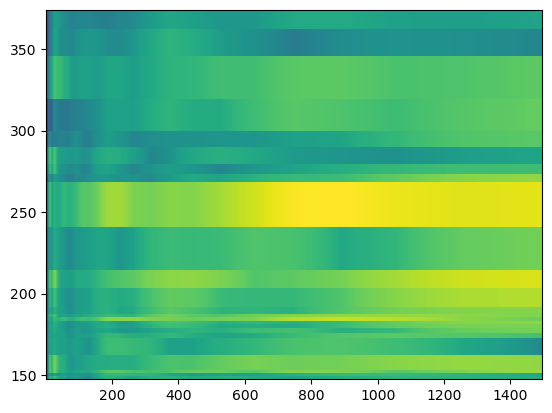

In [5]:
fig,ax=plt.subplots()
cax=ax.pcolormesh(x,y,z)

Text(0.5, 1.0, 'log(Wavelet Power)')

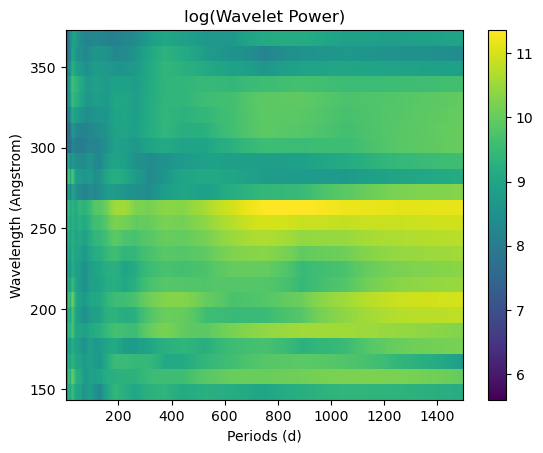

In [8]:
fig,ax=plt.subplots()
cax=ax.pcolormesh(xi,yi,zi,shading='auto')
fig.colorbar(cax, ax=ax)
ax.set_xlabel('Periods (d)')
ax.set_ylabel('Wavelength (Angstrom)')
ax.set_title('log(Wavelet Power)')

In [26]:
def combined_2d_plot(xi,yi,zi):
    

    fig,ax=plt.subplots()
    cax=ax.pcolormesh(xi,yi,zi,shading='auto')
    fig.colorbar(cax, ax=ax)
    ax.set_xlabel('Periods (d)')
    ax.set_ylabel('Wavelength (Angstrom)')
    ax.set_title('log(Wavelet Power)')


    fig = go.Figure(data=[go.Surface(
    z=zi, 
    x=xi, 
    y=yi,
    colorscale='thermal',
    hovertemplate=
    'Periods (d): %{x}<br>' +
    'Temperature: %{y}<br>' +
    'Log10(Global WS): %{z}<br>' +
    '<extra></extra>'  # Hide the secondary box
    )])

    # Update plot layout
    fig.update_layout(title='3D Surface Plot', 
                    scene=dict(
                        xaxis=dict(title='Periods (d)'#, range=[20, 38]
                                   ),
                        yaxis=dict(title='Temperature'),
                        zaxis=dict(title='log10(Global WS)'),
                        xaxis_title='Periods (d)',  # X-axis label
                        yaxis_title='Temperature',  # Y-axis label
                        zaxis_title='Log10(Global WS)'  # Z-axis label
                    ))


    fig.write_html('output\wavelet_explore\daily_plot_3d//test.html')
    # Showing the plot
    fig.show()

In [35]:
x=df.loc[0,'doppler period']
y=df['Temperature'].values
z=np.log10(np.vstack(df['doppler global_ws'].values))

mask = (20 < x)&(x < 30 )

# Select corresponding elements from x and z using boolean indexing
x = x[mask]
z = z[:,mask]

xi, yi, zi=interpolate_to_uniform_grid(x,y,z,scale_factor_y=10)

intput shape:x: (50,) y: (24,) z: (24, 50)
output shape:xi: (240, 50) yi: (240, 50) zi: (240, 50)


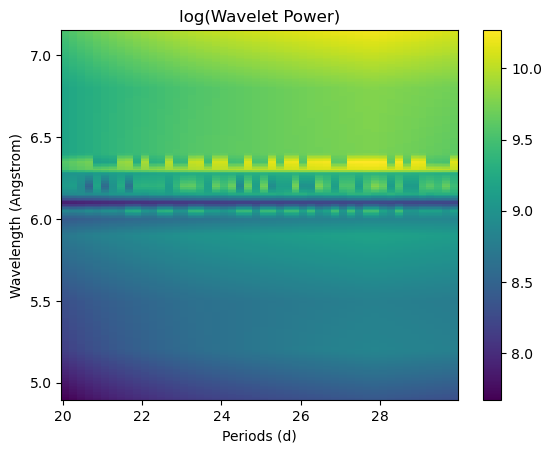

In [31]:
combined_2d_plot(xi,yi,zi)

In [ ]:
'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'

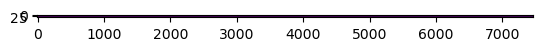

In [56]:
plt.imshow(z)

In [65]:
# count the nan in z
np.count_nonzero(np.isnan(z))
np.count_nonzero(np.isnan(zi))

0

Text(0, 0.5, 'Wavelength (Angstrom)')

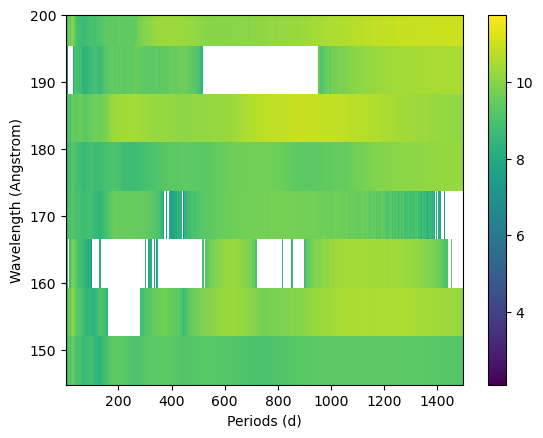

In [66]:
fig,ax=plt.subplots()
cax = ax.pcolormesh(xi, yi, np.log10(zi), shading='auto')



# ax.set_xscale('log')
ax.set_ylim(None,200)
fig.colorbar(cax, ax=ax)
ax.set_xlabel('Periods (d)')
ax.set_ylabel('Wavelength (Angstrom)')

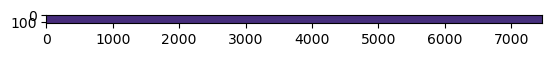

In [67]:
plt.imshow(zi)

# Matplotlib plot

## plot wavelength vs periods

In [135]:
property_list=['amplitude','mean','stddev']

for property in property_list:
    # Initialize an empty figure
    fig = go.Figure()

    # Iterate through each row in the DataFrame
    for index in df.index:
        # Extract the amplitude periods and create a list of the accurate wavelength of the same length
        x = df.loc[index][property+' periods']
        y = [df.loc[index]['Accurate Wavelength']] * len(x)
        
        # Add scatter plot for each set of x and y values to the figure
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name=df.loc[index]['Line Name']))

    # Update the layout to add labels
    fig.update_layout(
        xaxis_title='Periods (d)',
        yaxis_title='Wavelength (Å)',
        title='Periods vs Wavelength'
    )

    # Show the figure
    fig.show()
    # save the figure in html
    fig.write_html("output/period_wavelength/"+property+"_wavelet_wavelength.html")


KeyError: 'Accurate Wavelength'

Text(0, 0.5, 'Wavelength ($\\AA$)')

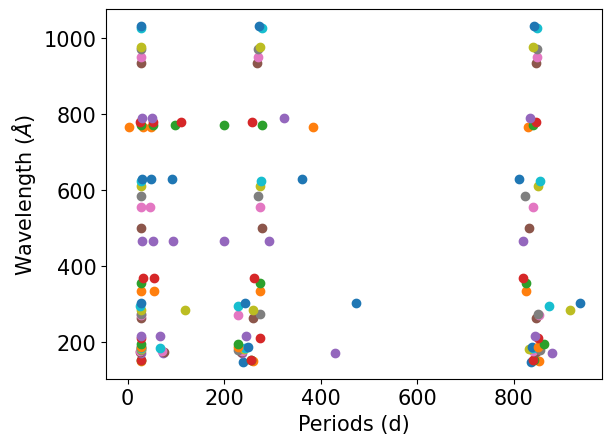

In [37]:
fig,ax=plt.subplots()
for index in df.index[:]:
    x=df.loc[index]['amplitude periods']
    y=np.full(len(x),df.loc[index]['Accurate Wavelength'])
    ax.scatter(x,y)

ax.set_xlabel('Periods (d)')
# y label wavelength in angstrom
ax.set_ylabel(r'Wavelength ($\AA$)')


(25.0, 30.0)

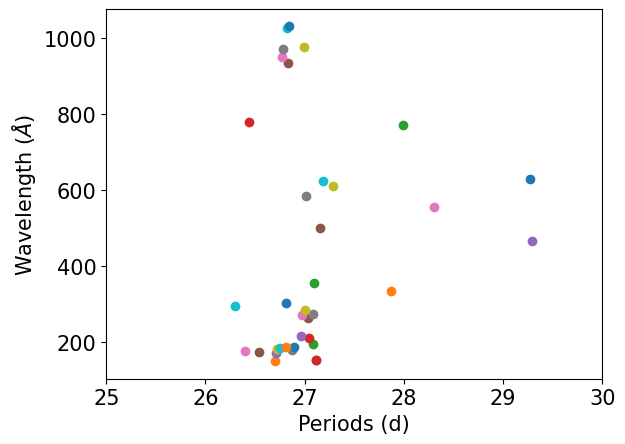

In [35]:
fig,ax=plt.subplots()
for index in df.index[:]:
    x=df.loc[index]['amplitude periods']
    y=np.full(len(x),df.loc[index]['Accurate Wavelength'])
    ax.scatter(x,y)

ax.set_xlabel('Periods (d)')
# y label wavelength in angstrom
ax.set_ylabel(r'Wavelength ($\AA$)')
ax.set_xlim(25,30)

(200.0, 300.0)

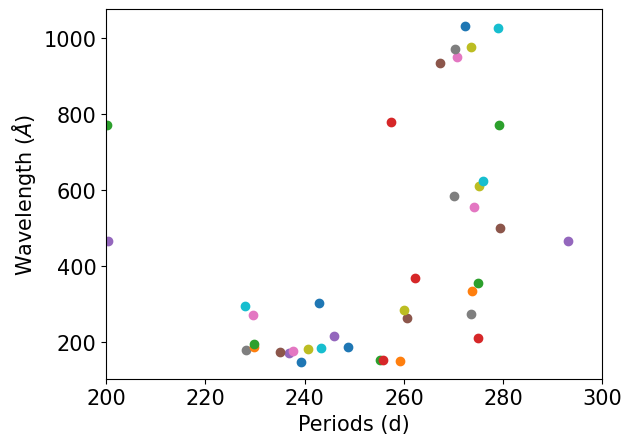

In [36]:
fig,ax=plt.subplots()
for index in df.index[:]:
    x=df.loc[index]['amplitude periods']
    y=np.full(len(x),df.loc[index]['Accurate Wavelength'])
    ax.scatter(x,y)

ax.set_xlabel('Periods (d)')
# y label wavelength in angstrom
ax.set_ylabel(r'Wavelength ($\AA$)')
ax.set_xlim(200,300)

## plot temperature vs periods

In [20]:
property_list=['amplitude','mean','stddev']

for property in property_list:

    # Initialize an empty figure
    fig = go.Figure()

    # Iterate through each row in the DataFrame
    for index in df.index:
        # Extract the amplitude periods
        x = df.loc[index][property+" periods"]
        # Extract the temperature, compute its logarithm, and create a list of the same length as x
        y = df.loc[index]['Temperature']  # Assuming np.log10 for the base-10 logarithm of temperature
        y = [y] * len(x)
        
        # Add scatter plot for each set of x and y values to the figure, the label set to be df.loc[index]['Line Name']
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name=df.loc[index]['Line Name']))

    # Update the layout to add labels and set x-axis limits
    fig.update_layout(
        xaxis=dict(
            title='Periods (d)',
            # range=[15, 40]  # Setting x-axis limits
        ),
        yaxis_title='log(Temperature) [K]',
        title='log(Temperature) vs Periods'
    )

    # Show the figure
    fig.show()
    fig.write_html("output/period_temperature/"+property+"_wavelet_temperature.html")

(15.0, 40.0)

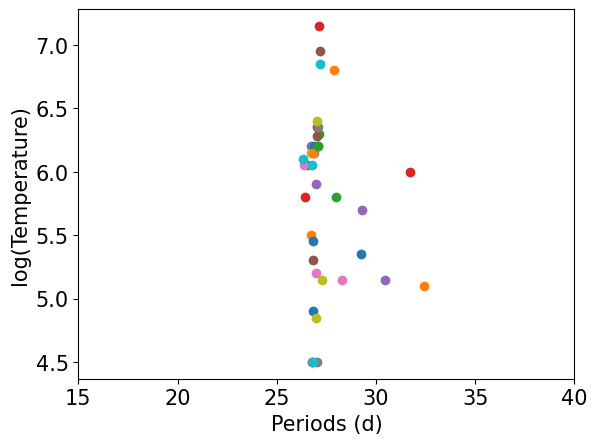

In [33]:
fig,ax=plt.subplots()
for index in df.index:
    x=df.loc[index]['amplitude periods']
    y=np.full(len(x),df.loc[index]['Temperature'])
    ax.scatter(x,y)


ax.set_xlabel('Periods (d)')
# temperature in kelvin and in log
ax.set_ylabel('log(Temperature)')
ax.set_xlim(15,40)

# Draft

In [41]:
df_simple['Age2']=[[25,3], [30,3], [35,3]]

In [36]:
# Create another simple DataFrame
df_simple = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [[25,3], [30,3], [35,3]],
    'City': ['New York', 'Los Angeles', 'Chicago']
})

# add a new col similar to age
df_simple['Age2'] = np.nan
df_simple.loc[0,'Age2'] = [25,3]


# Display the DataFrame
df_simple



ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
df_simple['new_col']=np.nan
df_simple
df_simple.iloc[0]['new_col']={'2':4}